In [7]:
import matplotlib.pyplot as plt
import numpy as np

try:
    import SafeRLBench as srb
except ImportError:
    import sys
    import os
    module_path = os.path.abspath('..')
    sys.path.append(module_path)
    import SafeRLBench as srb
    
np.set_printoptions(precision=5)

Instatiate Estimator. Finite Difference Estimator only works if if gets a good guess. Otherwise it will just drive uphill and thus get a zero gradient. 

Estimator parameters are pretty arbitrary.

In [31]:
mntcar = srb.GeneralMountainCar()
executer = srb.Rollout(mntcar)
policy_scale = np.array([1,10,100])
estimator = srb.LinearFDEstimator(executer, mntcar, max_it=200, eps=0.05, var = 0.1, 
                                  parameter_domain=np.array([0,2]), rate = -0.2)

In [32]:
par, conv = estimator._optimize(policy_scale)

Start Linear Finite Difference optimization:
Initial Parameters: [ 0.44586  1.15132  0.41997]
Run: 0  	Parameter: 	[ 0.44586  1.15132  0.41997]	Reward: -362.2210166299214
		Gradient: 	[ 0.25864 -0.01293 -1.17729]


This is the trajectory of the final parameter set.

-194.32104548670742


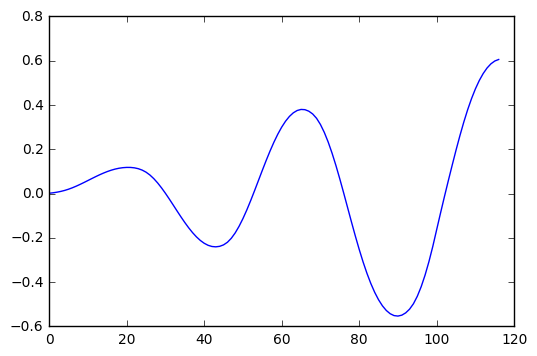

In [33]:
par_policy = lambda parameter: (lambda x: (parameter * policy_scale).dot(np.array([1,x[0],x[1]])))
trace, i, achieved = executer.rollout(par_policy(par))

print(sum([x[2] for x in trace]))

y = np.array([t[0] for t in [s[1] for s in trace]])
x = np.arange(0,i+1)

plt.plot(x,y)
plt.show()